In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error, max_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv("pKa_Data.csv")
data
# see the solvatochromic ref for details of \alpha, \beta and \pi. I do not know the excat solution used here. 

Name  AcidCharge  alpha  beta    pi  pKa_water  TotalCharge  \
0       Group1_1           1   0.00  0.00  0.00   2.537295            1   
1       Group1_2           1   0.00  0.11  0.55   2.537295            1   
2       Group1_3           1   0.00  0.00  0.00   2.289717            2   
3       Group1_4           1   0.00  0.11  0.55   2.289717            2   
4       Group1_5           1   1.12  0.45  0.60   0.639279            2   
...          ...         ...    ...   ...   ...        ...          ...   
1085  Group2_490           0   0.71  0.48  0.96   7.561958            0   
1086  Group2_491           0   0.98  0.66  0.60   7.561958            0   
1087  Group2_492           0   0.00  0.55  0.58   7.561958            0   
1088  Group2_493           0   0.00  0.11  0.55   7.561958            0   
1089  Group2_494           0   1.17  0.47  1.09   7.561958            0   

      pKa_Final  
0      5.861019  
1      6.045974  
2     -6.496620  
3     -4.585847  
4     -0.490751  
...         ...  
1085   9.770847  
1086  10.726398  
1087  23.211866  
1088  34.114489  
1089   7.561958  

[1090 rows x 8 columns]

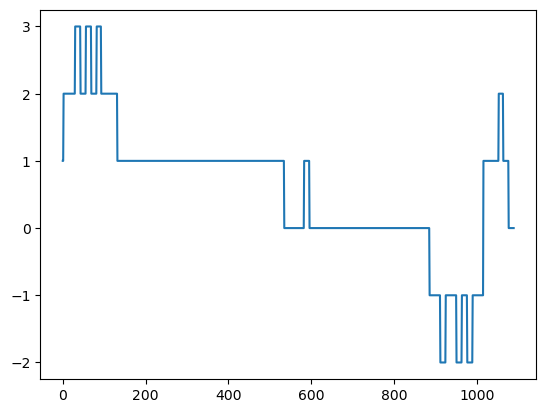

In [3]:
data.columns
# plt.plot(data['AcidCharge'])
plt.plot(data['TotalCharge'])

In [4]:
# Select columns to include into data set for ML model (inlcuding target)
data = data[['Name', 'AcidCharge', 'alpha', 'beta', 'pi', 'pKa_water', 'TotalCharge','pKa_Final']]
#data = data[['Name', 'AcidCharge', 'pKa_water', 'TotalCharge','pKa_Final']]

In [5]:
# Separate into test set and training set; test_size gives percentage of data in test set
train_data, test_data = train_test_split(data, test_size=0.25)

In [6]:
# Split training set into training varaibles "X" and target variable "Y"
X = train_data.drop(columns=['Name','pKa_Final'])# .to_numpy()
Y = train_data['pKa_Final']

In [7]:
# Split test data set equivalent to training data in Test_X and Test_Y
Test_X = test_data.drop(columns=['Name','pKa_Final'])# .to_numpy()
Test_Y = test_data['pKa_Final']

In [8]:
# Normalize training set "X" in order to minize weight of large values and avoid skewing
#Define scaler
scaler = MinMaxScaler()
# compute min and max values of training set for use in test set and training set
#scaler.fit(X)
# Apply scaler to test and training set "X"
#X = scaler.transform(X)
#Test_X = scaler.transform(Test_X)

In [9]:
# Define Gradient boost ML
GB_Model = GradientBoostingRegressor()
# Different parameters are tested and results compared
GB_Parameters = {'learning_rate': np.arange(0.05, 0.3, 0.05), 'loss': ['lad', 'huber'],
                 'n_estimators': np.arange(120, 160, 20)}

In [10]:
# Define Random Forest ML
RF_Model = RandomForestRegressor()
# Different parameters are tested and results compared
RF_Parameters = {"n_estimators": range(120, 160, 20), 'criterion': ['mae'],  "min_samples_split": [2,3,4]}

In [11]:
#Define Kernel Ridge ML
KR_Model = KernelRidge()
# Different parameters are tested and results compared
KR_Parameters = {'alpha': np.arange(0.1, 1.0, 0.1), 'kernel': ['linear', 'polynomial', 'laplacian'],
                 'degree': [2,3]}

In [12]:
# Execute Gradient boost ML
GB_Solver = GridSearchCV(GB_Model, GB_Parameters, n_jobs=6, cv=5, verbose=2,
                         scoring='neg_mean_absolute_error')
GB_Solver.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-1

/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:301: FutureWarning: The loss 'lad' was deprecated in v1.0 and will be removed in version 1.2. Use 'absolute_error' which is equivalent.
  warnings.warn(
/apps/chem/python/3.9-2022-1

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=6,
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25]),
                         'loss': ['lad', 'huber'],
                         'n_estimators': array([120, 140])},
             scoring='neg_mean_absolute_error', verbose=2)

In [13]:
# Execute Random Forest ML
RF_Solver = GridSearchCV(RF_Model, RF_Parameters, cv=5, verbose=2,  n_jobs=6,  scoring='neg_mean_absolute_error')
RF_Solver.fit(X,Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/apps/chem/python/3.9-2022-10/install/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  wa

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'criterion': ['mae'], 'min_samples_split': [2, 3, 4],
                         'n_estimators': range(120, 160, 20)},
             scoring='neg_mean_absolute_error', verbose=2)

In [14]:
# Execute Kernel ridge ML
KR_Solver = GridSearchCV(KR_Model, KR_Parameters, cv=5, verbose=2,  n_jobs=6,  scoring='neg_mean_absolute_error')
KR_Solver.fit(X,Y)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=KernelRidge(), n_jobs=6,
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'degree': [2, 3],
                         'kernel': ['linear', 'polynomial', 'laplacian']},
             scoring='neg_mean_absolute_error', verbose=2)

In [15]:
# Evaluate best parameters for the respective models and rerun calculation
print('Gradient boosting \n Best parameters:')
GB_BestFit = GB_Solver.best_params_
GB_FinalModel = GB_Solver.best_estimator_
print(GB_BestFit)

print('Random Forest \n Best parameters:')
RF_BestFit = RF_Solver.best_params_
RF_FinalModel = RF_Solver.best_estimator_
print(RF_BestFit)

print('Kernel ridege \n Best parameters:')
KR_BestFit = KR_Solver.best_params_
KR_FinalModel = KR_Solver.best_estimator_
print(KR_BestFit)

Gradient boosting 
 Best parameters:
{'learning_rate': 0.25, 'loss': 'huber', 'n_estimators': 140}
Random Forest 
 Best parameters:
{'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 140}
Kernel ridege 
 Best parameters:
{'alpha': 0.1, 'degree': 2, 'kernel': 'laplacian'}


In [16]:
# Print best results for Gradient boosting
print('The most accurate fits for Gradient boosting are:\n')
for param in pd.DataFrame(GB_Solver.cv_results_).sort_values("rank_test_score")["params"][0:10]:
    print(param)

The most accurate fits for Gradient boosting are:

{'learning_rate': 0.25, 'loss': 'huber', 'n_estimators': 140}
{'learning_rate': 0.25, 'loss': 'huber', 'n_estimators': 120}
{'learning_rate': 0.2, 'loss': 'huber', 'n_estimators': 120}
{'learning_rate': 0.2, 'loss': 'huber', 'n_estimators': 140}
{'learning_rate': 0.15000000000000002, 'loss': 'huber', 'n_estimators': 140}
{'learning_rate': 0.15000000000000002, 'loss': 'huber', 'n_estimators': 120}
{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 140}
{'learning_rate': 0.2, 'loss': 'lad', 'n_estimators': 140}
{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 120}
{'learning_rate': 0.25, 'loss': 'lad', 'n_estimators': 120}


In [17]:
# Print best results for Random Forest
print('The most accurate fits for Random Forest are:\n')
for param in pd.DataFrame(RF_Solver.cv_results_).sort_values("rank_test_score")["params"][0:10]:
    print(param)

The most accurate fits for Random Forest are:

{'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 140}
{'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 120}
{'criterion': 'mae', 'min_samples_split': 3, 'n_estimators': 140}
{'criterion': 'mae', 'min_samples_split': 3, 'n_estimators': 120}
{'criterion': 'mae', 'min_samples_split': 4, 'n_estimators': 140}
{'criterion': 'mae', 'min_samples_split': 4, 'n_estimators': 120}


In [18]:
# Print best results for Kernel Ridge
print('The most accurate fits for Kernel Ridge are:\n')
for param in pd.DataFrame(KR_Solver.cv_results_).sort_values("rank_test_score")["params"][0:10]:
    print(param)

The most accurate fits for Kernel Ridge are:

{'alpha': 0.1, 'degree': 2, 'kernel': 'laplacian'}
{'alpha': 0.1, 'degree': 3, 'kernel': 'laplacian'}
{'alpha': 0.2, 'degree': 2, 'kernel': 'laplacian'}
{'alpha': 0.2, 'degree': 3, 'kernel': 'laplacian'}
{'alpha': 0.30000000000000004, 'degree': 2, 'kernel': 'laplacian'}
{'alpha': 0.30000000000000004, 'degree': 3, 'kernel': 'laplacian'}
{'alpha': 0.1, 'degree': 3, 'kernel': 'polynomial'}
{'alpha': 0.4, 'degree': 3, 'kernel': 'laplacian'}
{'alpha': 0.4, 'degree': 2, 'kernel': 'laplacian'}
{'alpha': 0.2, 'degree': 3, 'kernel': 'polynomial'}


In [19]:
# Print ranking of Gradient boosting fits:
print('The most accurate fits for GRADIENT BOOSTING are [accuracy is given as negative mean absolute error]:')
GB_Result = pd.DataFrame(GB_Solver.cv_results_)
GB_Result = GB_Result.sort_values("rank_test_score")
for i, row in GB_Result.iterrows():
    print(row["mean_test_score"], row["params"])

The most accurate fits for GRADIENT BOOSTING are [accuracy is given as negative mean absolute error]:
-0.9154123356198323 {'learning_rate': 0.25, 'loss': 'huber', 'n_estimators': 140}
-0.9514318343483573 {'learning_rate': 0.25, 'loss': 'huber', 'n_estimators': 120}
-0.9847953485115299 {'learning_rate': 0.2, 'loss': 'huber', 'n_estimators': 120}
-0.9852242532992715 {'learning_rate': 0.2, 'loss': 'huber', 'n_estimators': 140}
-1.0155782307771173 {'learning_rate': 0.15000000000000002, 'loss': 'huber', 'n_estimators': 140}
-1.0535804093763281 {'learning_rate': 0.15000000000000002, 'loss': 'huber', 'n_estimators': 120}
-1.1497346748017163 {'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 140}
-1.1626176341861139 {'learning_rate': 0.2, 'loss': 'lad', 'n_estimators': 140}
-1.2098824937502168 {'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 120}
-1.2263315371806303 {'learning_rate': 0.25, 'loss': 'lad', 'n_estimators': 120}
-1.2370686018493895 {'learning_rate': 0.2, 'loss': 'lad',

In [20]:
# Print ranking of Random Forest fits:
print('The most accurate fits for RANDOM FOREST are [accuracy is given as negative mean absolute error]:')
RF_Result = pd.DataFrame(RF_Solver.cv_results_)
RF_Result = RF_Result.sort_values("rank_test_score")
for i, row in RF_Result.iterrows():
    print(row["mean_test_score"], row["params"])

The most accurate fits for RANDOM FOREST are [accuracy is given as negative mean absolute error]:
-1.1105896674294573 {'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 140}
-1.1153417999984119 {'criterion': 'mae', 'min_samples_split': 2, 'n_estimators': 120}
-1.1330503741071152 {'criterion': 'mae', 'min_samples_split': 3, 'n_estimators': 140}
-1.1389407443469082 {'criterion': 'mae', 'min_samples_split': 3, 'n_estimators': 120}
-1.1463761896974907 {'criterion': 'mae', 'min_samples_split': 4, 'n_estimators': 140}
-1.1543247849012226 {'criterion': 'mae', 'min_samples_split': 4, 'n_estimators': 120}


In [21]:
# Print ranking of Kernel Ridge fits:
print('The most accurate fits for KERNEL RIDGE are [accuracy is given as negative mean absolute error]:')
KR_Result = pd.DataFrame(KR_Solver.cv_results_)
KR_Result = KR_Result.sort_values("rank_test_score")
for i, row in KR_Result.iterrows():
    print(row["mean_test_score"], row["params"])

The most accurate fits for KERNEL RIDGE are [accuracy is given as negative mean absolute error]:
-1.1281168012347353 {'alpha': 0.1, 'degree': 2, 'kernel': 'laplacian'}
-1.1281168012347353 {'alpha': 0.1, 'degree': 3, 'kernel': 'laplacian'}
-1.3089198185413913 {'alpha': 0.2, 'degree': 2, 'kernel': 'laplacian'}
-1.3089198185413913 {'alpha': 0.2, 'degree': 3, 'kernel': 'laplacian'}
-1.4369294872946063 {'alpha': 0.30000000000000004, 'degree': 2, 'kernel': 'laplacian'}
-1.4369294872946063 {'alpha': 0.30000000000000004, 'degree': 3, 'kernel': 'laplacian'}
-1.4929773777497124 {'alpha': 0.1, 'degree': 3, 'kernel': 'polynomial'}
-1.5381852978635444 {'alpha': 0.4, 'degree': 3, 'kernel': 'laplacian'}
-1.5381852978635444 {'alpha': 0.4, 'degree': 2, 'kernel': 'laplacian'}
-1.5755218347019686 {'alpha': 0.2, 'degree': 3, 'kernel': 'polynomial'}
-1.6157758632519026 {'alpha': 0.30000000000000004, 'degree': 3, 'kernel': 'polynomial'}
-1.6234241591359588 {'alpha': 0.5, 'degree': 3, 'kernel': 'laplacian'}


# Plot Results for Training Set - Gradient Boosting

R^2: 0.9949345980279635
Mean absolute error: 0.5086328846452616
Median absolute error: 0.33631890058838465
Maximum error: 5.167976132410281
General accuracy between predicted and DFT data:

y = 1.0085108438350943X + -0.12213849618383499


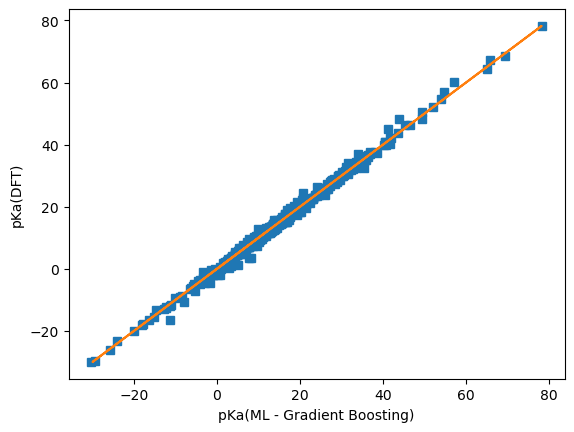

In [22]:
# Gradient boosting
# Read in data
GB_Train_pKaML = GB_FinalModel.predict(X)
# Plot data
plt.plot(GB_Train_pKaML, Y, 's')
plt.plot(Y, Y)
plt.xlabel('pKa(ML - Gradient Boosting)')
plt.ylabel('pKa(DFT)')
GB_r2_score = r2_score(GB_Train_pKaML, Y)
GB_MAE_score = mean_absolute_error(GB_Train_pKaML, Y)
GB_MedianMAE_score = median_absolute_error(GB_Train_pKaML, Y)
GB_MaxError_score = max_error(GB_Train_pKaML, Y)
print('R^2:', GB_r2_score)
print('Mean absolute error:', GB_MAE_score)
print('Median absolute error:', GB_MedianMAE_score)
print('Maximum error:', GB_MaxError_score)

#determine slope and intercept
from scipy.stats import linregress
GB_SlopeIntercept = linregress(GB_Train_pKaML, Y)
print('General accuracy between predicted and DFT data:\n')
print('y = {}X + {}'.format(GB_SlopeIntercept.slope, GB_SlopeIntercept.intercept))


# Plot Results for Training Set - Random Forest

R^2: 0.995726811069265
Mean absolute error: 0.3949856618912675
Median absolute error: 0.17204986447167592
Maximum error: 5.163385873593015
General accuracy between predicted and DFT data:

y = 1.016983512339295X + -0.22691938606160456


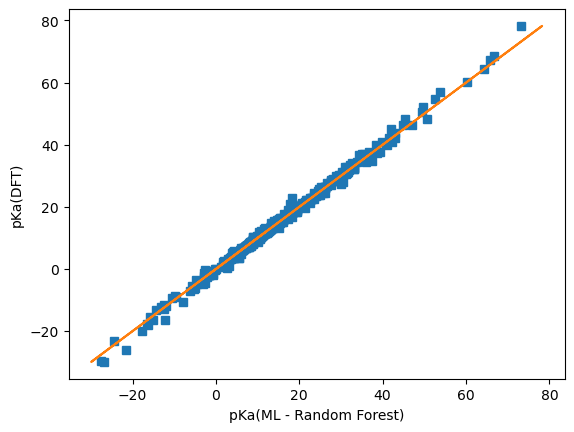

In [23]:
# Random forest
# Read in data
RF_Train_pKaML = RF_FinalModel.predict(X)
# Plot data
plt.plot(RF_Train_pKaML, Y, 's')
plt.plot(Y, Y)
plt.xlabel('pKa(ML - Random Forest)')
plt.ylabel('pKa(DFT)')
RF_r2_score = r2_score(RF_Train_pKaML, Y)
RF_MAE_score = mean_absolute_error(RF_Train_pKaML, Y)
RF_MedianMAE_score = median_absolute_error(RF_Train_pKaML, Y)
RF_MaxError_score = max_error(RF_Train_pKaML, Y)
print('R^2:', RF_r2_score)
print('Mean absolute error:', RF_MAE_score)
print('Median absolute error:', RF_MedianMAE_score)
print('Maximum error:', RF_MaxError_score)

#determine slope and intercept
from scipy.stats import linregress
RF_SlopeIntercept = linregress(RF_Train_pKaML, Y)
print('General accuracy between predicted and DFT data:\n')
print('y = {}X + {}'.format(RF_SlopeIntercept.slope, RF_SlopeIntercept.intercept))

# Plot Results for Training Set - Kernel Ridge

R^2: 0.9914760759717273
Mean absolute error: 0.6482672195730306
Median absolute error: 0.4006282303015407
Maximum error: 6.659501674042247
General accuracy between predicted and DFT data:

y = 1.0212527819575357X + -0.278696236412733


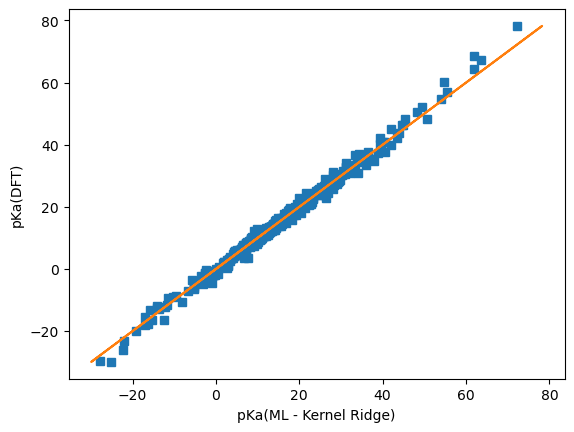

In [24]:
# Kernel ridge
# Read in data
KR_Train_pKaML = KR_FinalModel.predict(X)
# Plot data
plt.plot(KR_Train_pKaML, Y, 's')
plt.plot(Y, Y)
plt.xlabel('pKa(ML - Kernel Ridge)')
plt.ylabel('pKa(DFT)')
KR_r2_score = r2_score(KR_Train_pKaML, Y)
KR_MAE_score = mean_absolute_error(KR_Train_pKaML, Y)
KR_MedianMAE_score = median_absolute_error(KR_Train_pKaML, Y)
KR_MaxError_score = max_error(KR_Train_pKaML, Y)
print('R^2:', KR_r2_score)
print('Mean absolute error:', KR_MAE_score)
print('Median absolute error:', KR_MedianMAE_score)
print('Maximum error:', KR_MaxError_score)

#determine slope and intercept
from scipy.stats import linregress
KR_SlopeIntercept = linregress(KR_Train_pKaML, Y)
print('General accuracy between predicted and DFT data:\n')
print('y = {}X + {}'.format(KR_SlopeIntercept.slope, KR_SlopeIntercept.intercept))

# Plot Results for Test Set - Gradient Boosting

R^2: 0.9844723231031991
Mean absolute error: 0.8115244224407081
Median absolute error: 0.47438112809848576
Maximum error: 8.423513128940067
General accuracy between predicted and DFT data:

y = 1.0115821192098715X + -0.20715677762570017


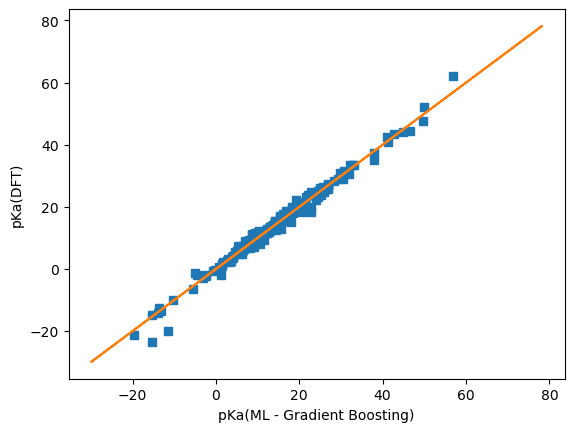

In [25]:
# Gradient boosting
# Read in data
GB_Test_pKaML = GB_FinalModel.predict(Test_X)
# Plot data
plt.plot(GB_Test_pKaML, Test_Y, 's')
plt.plot(Y, Y)
plt.xlabel('pKa(ML - Gradient Boosting)')
plt.ylabel('pKa(DFT)')
GB_r2_score = r2_score(GB_Test_pKaML, Test_Y)
GB_MAE_score = mean_absolute_error(GB_Test_pKaML, Test_Y)
GB_MedianMAE_score = median_absolute_error(GB_Test_pKaML, Test_Y)
GB_MaxError_score = max_error(GB_Test_pKaML, Test_Y)
print('R^2:', GB_r2_score)
print('Mean absolute error:', GB_MAE_score)
print('Median absolute error:', GB_MedianMAE_score)
print('Maximum error:', GB_MaxError_score)

#determine slope and intercept
from scipy.stats import linregress
GB_SlopeIntercept = linregress(GB_Test_pKaML, Test_Y)
print('General accuracy between predicted and DFT data:\n')
print('y = {}X + {}'.format(GB_SlopeIntercept.slope, GB_SlopeIntercept.intercept))


# Plot Results for Test Set - Random Forest

R^2: 0.970454367381734
Mean absolute error: 0.9138931705513568
Median absolute error: 0.41933053289696076
Maximum error: 14.925889706615607
General accuracy between predicted and DFT data:

y = 1.0005419204964727X + -0.1035920802934509


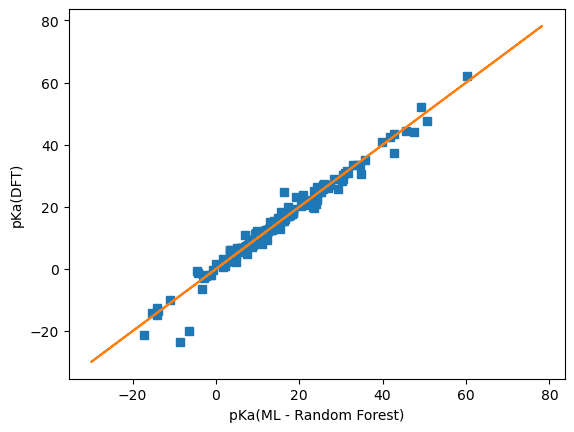

In [26]:
# Random Forest
# Read in data
RF_Test_pKaML = RF_FinalModel.predict(Test_X)
# Plot data
plt.plot(RF_Test_pKaML, Test_Y, 's')
plt.plot(Y, Y)
plt.xlabel('pKa(ML - Random Forest)')
plt.ylabel('pKa(DFT)')
RF_r2_score = r2_score(RF_Test_pKaML, Test_Y)
RF_MAE_score = mean_absolute_error(RF_Test_pKaML, Test_Y)
RF_MedianMAE_score = median_absolute_error(RF_Test_pKaML, Test_Y)
RF_MaxError_score = max_error(RF_Test_pKaML, Test_Y)
print('R^2:', RF_r2_score)
print('Mean absolute error:', RF_MAE_score)
print('Median absolute error:', RF_MedianMAE_score)
print('Maximum error:', RF_MaxError_score)

#determine slope and intercept
from scipy.stats import linregress
RF_SlopeIntercept = linregress(RF_Test_pKaML, Test_Y)
print('General accuracy between predicted and DFT data:\n')
print('y = {}X + {}'.format(RF_SlopeIntercept.slope, RF_SlopeIntercept.intercept))

# Plot Results for Test Set - Kernel Ridge

R^2: 0.9782958340418056
Mean absolute error: 0.8872770670847003
Median absolute error: 0.45227729359863744
Maximum error: 10.92433881253912
General accuracy between predicted and DFT data:

y = 1.0190576390975887X + -0.2955650036349553


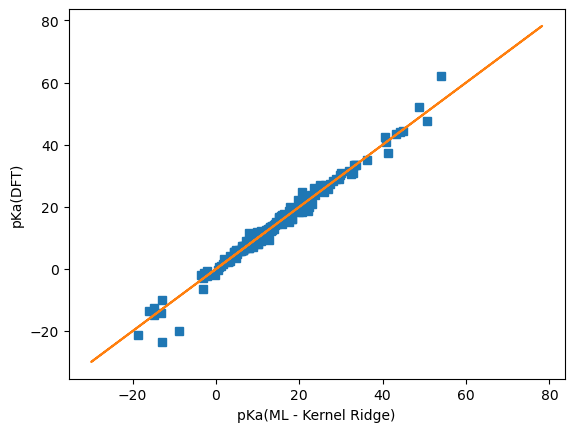

In [27]:
# Kernel Ridge
# Read in data
KR_Test_pKaML = KR_FinalModel.predict(Test_X)
# Plot data
plt.plot(KR_Test_pKaML, Test_Y, 's')
plt.plot(Y, Y)
plt.xlabel('pKa(ML - Kernel Ridge)')
plt.ylabel('pKa(DFT)')
KR_r2_score = r2_score(KR_Test_pKaML, Test_Y)
KR_MAE_score = mean_absolute_error(KR_Test_pKaML, Test_Y)
KR_MedianMAE_score = median_absolute_error(KR_Test_pKaML, Test_Y)
KR_MaxError_score = max_error(KR_Test_pKaML, Test_Y)
print('R^2:', KR_r2_score)
print('Mean absolute error:', KR_MAE_score)
print('Median absolute error:', KR_MedianMAE_score)
print('Maximum error:', KR_MaxError_score)

#determine slope and intercept
from scipy.stats import linregress
KR_SlopeIntercept = linregress(KR_Test_pKaML, Test_Y)
print('General accuracy between predicted and DFT data:\n')
print('y = {}X + {}'.format(KR_SlopeIntercept.slope, KR_SlopeIntercept.intercept))

# Feature importance analysis - Gradient Boosting

<BarContainer object of 6 artists>

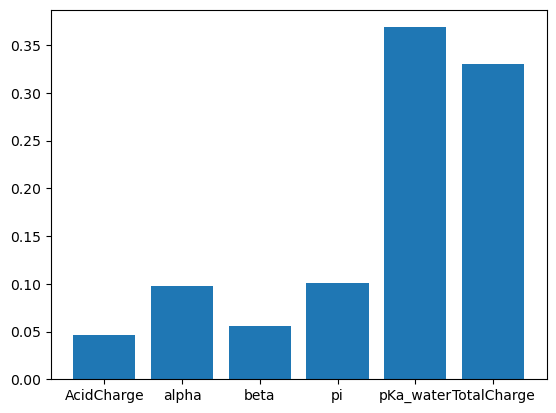

In [28]:
GB_feature_importance = GB_FinalModel.feature_importances_
data_used = train_data.drop(columns= ['pKa_Final', 'Name'])
plt.bar(data_used.columns, GB_feature_importance)

# Feature importance analysis - Random Forest

<BarContainer object of 6 artists>

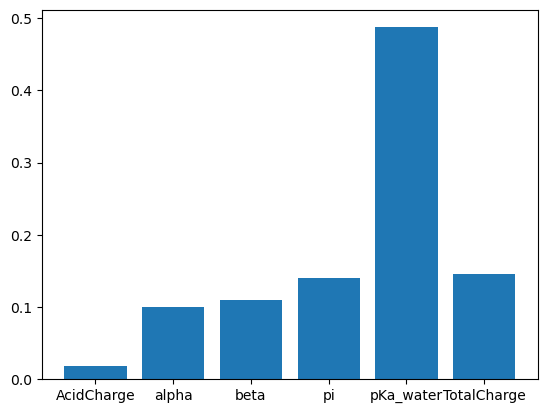

[CV] END .....learning_rate=0.05, loss=lad, n_estimators=120; total time=   0.2s
[CV] END .....learning_rate=0.05, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.05, loss=huber, n_estimators=140; total time=   0.3s
[CV] END ......learning_rate=0.1, loss=lad, n_estimators=120; total time=   0.2s
[CV] END ......learning_rate=0.1, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ....learning_rate=0.1, loss=huber, n_estimators=120; total time=   0.2s
[CV] END ....learning_rate=0.1, loss=huber, n_estimators=140; total time=   0.3s
[CV] END learning_rate=0.15000000000000002, loss=lad, n_estimators=140; total time=   0.2s
[CV] END learning_rate=0.15000000000000002, loss=huber, n_estimators=120; total time=   0.2s
[CV] END learning_rate=0.15000000000000002, loss=huber, n_estimators=140; total time=   0.3s
[CV] END ......learning_rate=0.2, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ....learning_rate=0.2, loss=huber, n_estimators=120; total time=  

[CV] END .....learning_rate=0.05, loss=lad, n_estimators=120; total time=   0.2s
[CV] END .....learning_rate=0.05, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.05, loss=huber, n_estimators=120; total time=   0.2s
[CV] END ...learning_rate=0.05, loss=huber, n_estimators=140; total time=   0.3s
[CV] END ......learning_rate=0.1, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ....learning_rate=0.1, loss=huber, n_estimators=120; total time=   0.2s
[CV] END ....learning_rate=0.1, loss=huber, n_estimators=140; total time=   0.3s
[CV] END learning_rate=0.15000000000000002, loss=lad, n_estimators=140; total time=   0.2s
[CV] END learning_rate=0.15000000000000002, loss=huber, n_estimators=120; total time=   0.2s
[CV] END learning_rate=0.15000000000000002, loss=huber, n_estimators=140; total time=   0.3s
[CV] END ......learning_rate=0.2, loss=lad, n_estimators=120; total time=   0.2s
[CV] END ......learning_rate=0.2, loss=lad, n_estimators=140; total time=  

[CV] END .....learning_rate=0.05, loss=lad, n_estimators=120; total time=   0.2s
[CV] END .....learning_rate=0.05, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.05, loss=huber, n_estimators=120; total time=   0.2s
[CV] END ...learning_rate=0.05, loss=huber, n_estimators=140; total time=   0.3s
[CV] END ......learning_rate=0.1, loss=lad, n_estimators=140; total time=   0.2s
[CV] END ....learning_rate=0.1, loss=huber, n_estimators=120; total time=   0.2s
[CV] END ....learning_rate=0.1, loss=huber, n_estimators=140; total time=   0.3s
[CV] END learning_rate=0.15000000000000002, loss=lad, n_estimators=120; total time=   0.2s
[CV] END learning_rate=0.15000000000000002, loss=huber, n_estimators=120; total time=   0.2s
[CV] END learning_rate=0.15000000000000002, loss=huber, n_estimators=140; total time=   0.3s
[CV] END ......learning_rate=0.2, loss=lad, n_estimators=120; total time=   0.2s
[CV] END ......learning_rate=0.2, loss=lad, n_estimators=140; total time=  

In [29]:
RF_feature_importance = RF_FinalModel.feature_importances_
data_used = train_data.drop(columns= ['pKa_Final', 'Name'])
plt.bar(data_used.columns, RF_feature_importance)